# Python CausalMLで実践する「機械学習因果推論」超入門
# – その2：マーケティング事例で学ぶ因果効果推定 –

url : https://www.salesanalytics.co.jp/datascience/datascience218/

ビジネスの意思決定に革命を起こす因果推論の力を、実践的に体験してみませんか？

企業が新たなマーケティング戦略を展開する際、医療専門家が治療法の効果を評価する時、または政策立案者が社会政策の成果を測る際に、単に「何が起こったか」ではなく、「なぜそれが起こったのか」を理解することが求められます。

前回の記事では、CausalMLライブラリの基本的な使い方を学びました。

url: https://www.salesanalytics.co.jp/datascience/datascience217/

今回は、その知識を活かして、実際のマーケティング事例に因果推論を適用していきます。

平均処置効果（ATE）、条件付き平均処置効果（CATE）、処置反応関数など、因果効果推定の重要な概念を順を追って説明し、マーケティングキャンペーンの効果を評価する方法を解説します。

Pythonコード例を交えながら、ステップバイステップで因果効果推定のプロセスを追っていくことで、前回学んだCausalMLライブラリの使い方をより実践的に理解することができるでしょう。

データドリブンなマーケティングの意思決定に役立つ因果推論のスキルを、一緒に身につけていきましょう！

## はじめに

前回、因果推論の基礎概念とCausalMLライブラリの導入方法について学びました。

url: https://www.salesanalytics.co.jp/datascience/datascience217/

今回は、その知識を活かして、マーケティングにおける因果効果推定の重要性を理解し、実際の事例に適用していきましょう。

マーケティングにおいて、施策の効果を正確に把握することは非常に重要です。

しかし、単純に施策実施前後の結果を比較するだけでは、様々な交絡因子の影響を受けるため、真の因果効果を推定することが難しくなります。

そこで、因果推論の手法を用いることで、交絡因子の影響を取り除き、施策の真の効果を推定することができます。



## 機械学習因果推論メタラーナー
## メタラーナーとは？

メタラーナー（Meta-learners）は、観測データから因果効果を推定するために機械学習モデルを活用する一連の手法です。

これらの手法は、特にランダム化されたコントロール試験が実施できない状況において、処置（または介入）の効果を評価するために有用です。

メタラーナーは、データの複雑さや非線形性、および処置効果の異質性を扱う能力により、因果推論の精度を向上させます。

以下の表は、5つの主要なメタラーナー（S-Learner, T-Learner, X-Learner, R-Learner, DR-Learner）を、その特徴、適用シナリオ、および選択する際の考慮点についてまとめたものです。

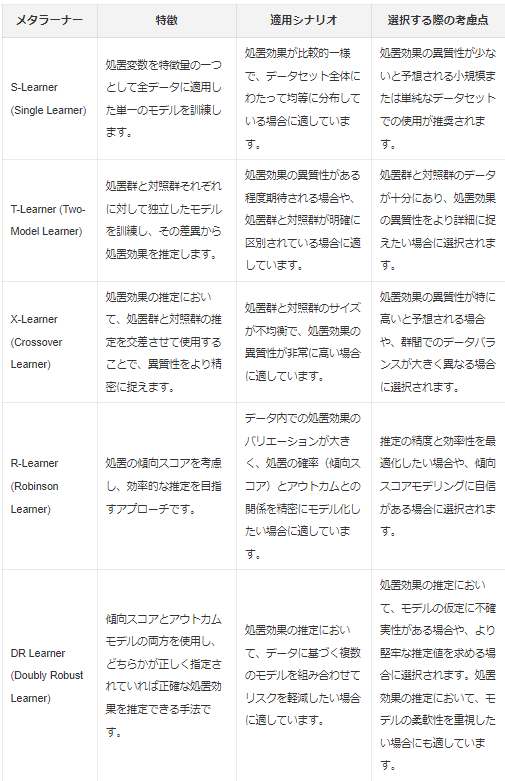

機械学習モデルという観点で簡単に述べると、S-LearnerとT-Learnerはシンプルなもので、 X-LearnerとR-Learner、DR Learnerは高度なものになります。

    S-Learner (Single Learner):
処置効果が全体的に均一であると予想されるシンプルなデータセットに適しています。小規模なデータセットや、処置効果の異質性が少ないと考えられる場合に推奨されます。

    T-Learner (Two-Model Learner):
処置群と対照群間で処置効果の異質性がある程度存在すると予想される場合に適しています。処置群と対照群が明確に分かれており、それぞれに十分なデータがある場合に好まれます。

    X-Learner (Crossover Learner):
処置群と対照群のサイズが不均等であり、処置効果の異質性が非常に高いと予想される場合に特に有効です。不均衡なデータセットでの処置効果の精密な推定に適しています。

    R-Learner (Robinson Learner):
処置の傾向スコアを利用して効率的な推定を目指すため、データ内の処置効果のバリエーションが大きい場合や、処置の確率とアウトカムとの関係を精密にモデル化したい場合に適しています。

    DR Learner (Doubly Robust Learner):
傾向スコアとアウトカムモデルの両方を使用するため、どちらかのモデル指定に誤りがあっても正確な推定が可能です。処置効果の推定においてモデルの仮定に不確実性がある場合や、より堅牢な推定値を求める場合に適しています。

## 5つの主要なメタラーナー

各メタラーナー（S-Learner, T-Learner, X-Learner, R-Learner, DR-Learner）を理解するために、それぞれのアプローチを簡単な数式を用いて表現します。

    X :共変量（特徴量）
    T :処置変数（T=1は処置群、T=0は対照群）
    Y :アウトカム（結果変数）

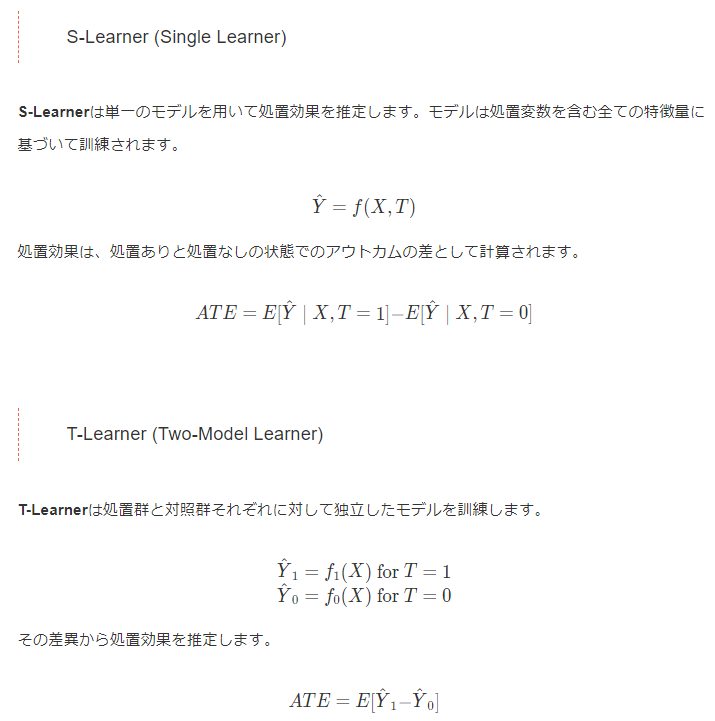

## X-Learner (Crossover Learner)
X-Learnerは、特に処置効果の異質性が高い場合や処置群と対照群のサイズが不均衡な場合に有効な手法です。

T-Learnerから得られた推定値を基に、処置群と対照群のデータを交差させて使用し、異質性を精密に捉えることを目指します。

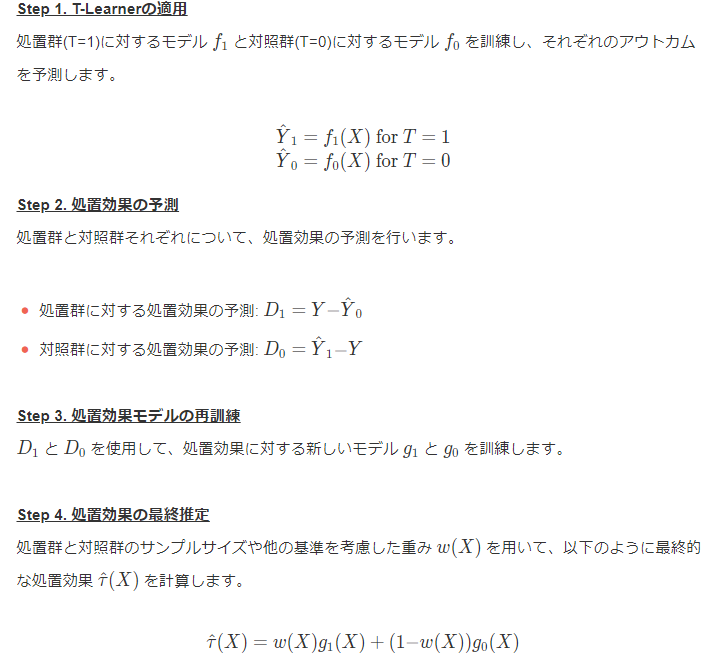

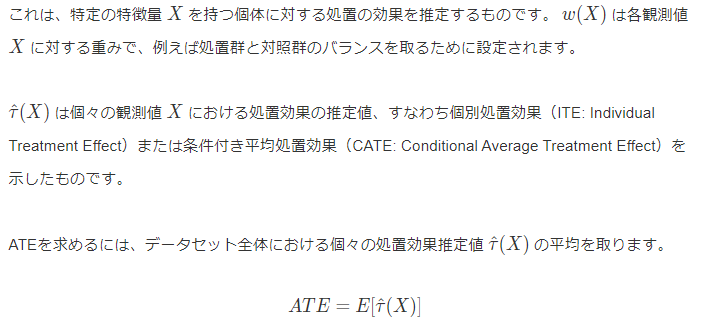

## R-Learner (Robinson Learner)


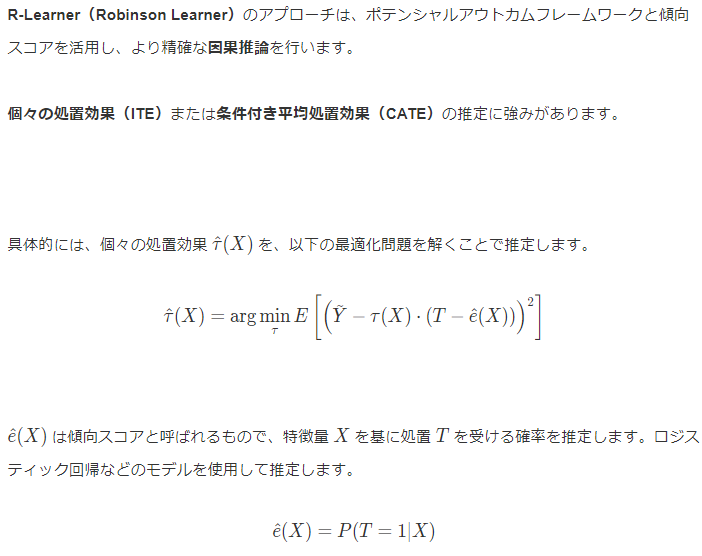

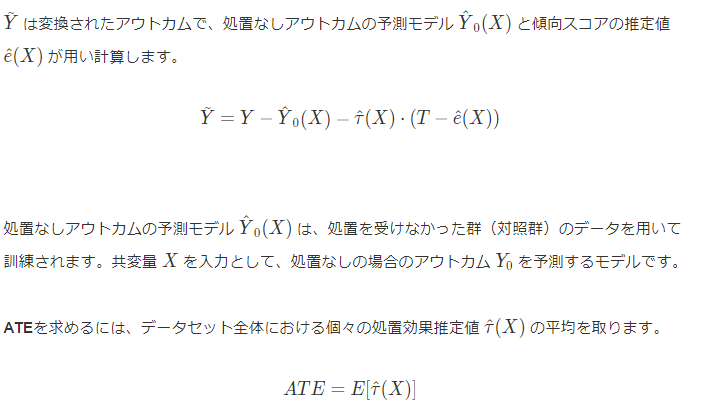

## DR-Learner (Doubly Robust Learner)

DR Learner（Doubly Robust Learner）は、傾向スコア推定とアウトカムモデルの両方を利用することで、いずれかが正確であれば正確な処置効果推定を可能にする手法です。これにより、推定のロバスト性が向上します。

DR Learnerのアプローチは、以下のように表現されます。

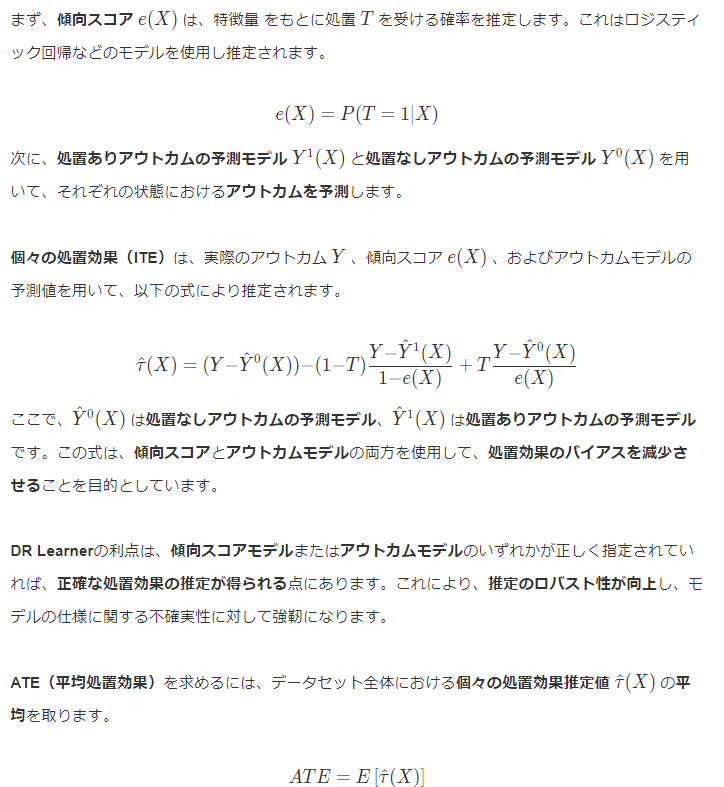

## ATE・CATE・ITE

メタラーナーの概要説明の最後に、ATE（すべての個体にわたる処置効果の平均値）・CATE（特定の特徴量を持つ個体群にわたる処置効果の平均値）・ITE（個々の個体における処置効果）の視点で整理します。

    S-Learner:
データセットが小さく、処置効果が均一である場合に最適ですが、個別の処置効果の異質性を詳細に捉えることには限界があります。

    T-Learner:
処置効果の異質性を探るための良い出発点ですが、群間のサイズが不均衡な場合には注意が必要です。

    X-Learner:
異質性が高く、群間のサイズが不均衡な場合に有効ですが、計算コストが高くなる可能性があります。

    R-Learner:
効率的な推定を目指す場合に適していますが、傾向スコアと処置なしアウトカムのモデルの精度が推定の正確性に大きく影響します。

    DR Learner:
傾向スコアとアウトカムモデルの両方を組み合わせて、一方のモデルに過度に依存するリスクを軽減し高いロバスト性と精度を提供します。

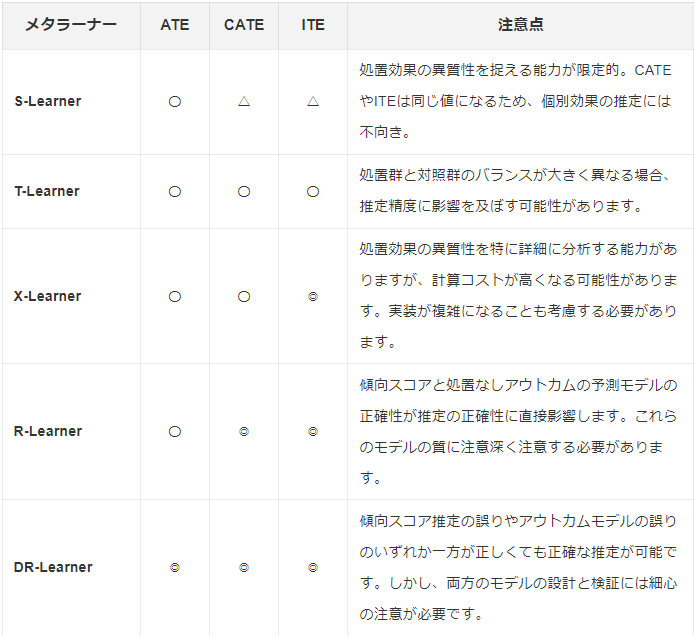

ATE: すべての個体にわたる処置効果の平均値

    S-Learnerは全体としての処置効果を推定するが、異質性の探索は限定的。
    T-LearnerとX-Learnerは、処置群と対照群の予測値の差の平均を取ることでATEを推定。
    R-Learnerは、最適化された処置効果関数の平均を通じてATEを推定する。
    DR-Learnerは、傾向スコアとアウトカムモデルの両方を利用し、どちらかが正確であれば正確なATEの推定を可能にする。

CATE: 特定の特徴量を持つ個体群にわたる処置効果の平均値

    全てのメタラーナーは、特徴量に基づく処置効果の異質性を考慮してCATEを推定可能。
    特にX-LearnerとR-Learnerは、異質性を捉えるための強力なアプローチを提供。
    DR-Learnerもまた、モデルがどちらか一方の仕様に依存しすぎることなく、特徴量に基づくCATEの正確な推定を支援する。

ITE: 個々の個体における処置効果

    T-Learner, X-Learner, R-Learnerは、異なるアプローチを通じてITEの推定を可能にする。
    特にR-Learnerは、効率的な推定を通じてITEに焦点を当てる。
    DR-Learnerは、傾向スコアとアウトカムモデルの両方を組み合わせたアプローチにより、個々の処置効果のロバストな推定を提供する。

要するに、小難しい理論を脇において考えると、実務的にはR-LearnerかDR-Learnerを使えばいい感じになります。分かりやすさでいえば、S-LearnerとT-Learnerです。

R-LearnerとDR-Learnerで肝になってくるのが傾向スコアです。次回お話ししますが、R-Learnerは先ほど言及したように内部で傾向スコアを使いますし、DR-Learnerは傾向スコアから求めるIPW推定量を内部で求め最終的なATEなどを計算します。

ちなみに、傾向スコアは、T-LearnerでX-Learnerでも必要があれば使いATEなどを推定します。

## 今回の事例とデータセット
## 事例の概要

では、具体的なマーケティング事例を紹介しましょう。

今回は、あるECサイトが行ったプロモーションキャンペーンの効果を推定する事例を扱います。

このECサイトでは、新規顧客の獲得と売上の向上を目的として、期間限定のプロモーションキャンペーンを実施しました。

キャンペーンでは、サイト内のバナー広告や電子メールを通じて、割引クーポンを配布しました。キャンペーンの真の効果を把握するために、因果効果推定を行うことにしました。

## サンプルデータ

分析に使用するデータは、キャンペーン実施期間中の顧客行動データです。主な変数は以下の通りです。

    処置変数（treatment）：キャンペーンの配信有無（バイナリ変数）
    結果変数（purchase_amount）：キャンペーン期間中の購買金額（連続変数）
    共変量（age, gender, past_purchases）：顧客の属性情報（年齢、性別、過去の購買履歴など）

このサンプルデータは、以下からダウンロードできます。

data20240319.csv

https://www.salesanalytics.co.jp/v3p3

では読み込み、見てみます。

以下、コードです。

In [1]:
import pandas as pd

data = pd.read_csv("data20240319.csv", index_col="user_id")
display(data)

,treatment,purchase_amount,age,gender,past_purchases
user_id,,,,,
1,0,8609,64,M,5
2,1,5241,29,F,0
3,1,6458,33,M,4
4,1,6887,41,M,2
5,0,5747,36,F,0
...,...,...,...,...,...
996,0,6590,40,M,7
997,1,7379,43,M,6
998,0,4341,21,M,5


Gender（性別）を、ラベルエンコーディングで数値に変換します。

以下、コードです。



In [2]:
from sklearn.preprocessing import LabelEncoder

# Genderを数値に変換
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
display(data)

,treatment,purchase_amount,age,gender,past_purchases
user_id,,,,,
1,0,8609,64,1,5
2,1,5241,29,0,0
3,1,6458,33,1,4
4,1,6887,41,1,2
5,0,5747,36,0,0
...,...,...,...,...,...
996,0,6590,40,1,7
997,1,7379,43,1,6
998,0,4341,21,1,5


ラベルエンコーディングは、カテゴリ変数を数値に変換する方法の一つで、各カテゴリに一意の整数を割り当てて、数値データとして扱います。

例えば、性別カテゴリが M と F の2つだけ存在する場合、ラベルエンコーディングにより M を 1、 F を 0 といった形で数値に変換できます。

この方法は、モデルがカテゴリ変数を直接処理できない場合に有用ですが、一方で新しく割り当てられた数値間に意味のある順序や距離が存在しないため、間違った表現を導く可能性があります。

そのため、順序が無関係なカテゴリ変数（名義尺度）を扱う際には、一般的にラベルエンコーディングではなく、ワンホットエンコーディング（ダミー変数化）などの手法が適切とされています。

このデータを使って、機械学習による因果推論を進めます。

## 平均処置効果（ATE）の推定


平均処置効果（Average Treatment Effect: ATE）は、処置を受けたグループと受けなかったグループの結果変数の平均差を表します。

ATEを推定することで、処置の全体的な効果を把握することができます。

メタラーナーの1つである S-Learner で、ATEを推定します。

以下、コードです。

In [3]:
pip install causalml

In [4]:
from causalml.inference.meta import BaseSRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 推定器の定義
estimator = BaseSRegressor(learner=GradientBoostingRegressor())

# ATEの推定
ate_estimate = estimator.estimate_ate(
    X=data[['age', 'gender', 'past_purchases']],
    treatment=data['treatment'],
    y=data['purchase_amount'])

print(f"Average Treatment Effect (ATE): {ate_estimate[0]:.2f}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Average Treatment Effect (ATE): 571.35


このコードの概要を説明します。

このコードの要点を箇条書きで説明します：

    ライブラリのインポート
causalmlからBaseSRegressorをインポート。これは因果推論のためのS-learnerです。
sklearn.ensembleからGradientBoostingRegressorをインポート。これは勾配ブースティングを用いた回帰モデルです。

    推定器の定義:
GradientBoostingRegressorを用いてBaseSRegressorの推定器を定義。
勾配ブースティングモデルを学習アルゴリズムとして使用します。

    ATEの推定:
estimate_ateメソッドを使用して平均処置効果（ATE）を推定。
共変量（X）としてage（年齢）、gender（性別）、past_purchases（過去の購入履歴）を使用。
処置変数（treatment）と結果変数（y、ここではpurchase_amount）を指定。

    結果の出力:
推定されたATEを表示。
この値は、処置の有無が結果変数（例：購入額）に与える平均的な影響を表します。

推定された平均処置効果 (Average Treatment Effect, ATE) が正の値であれば、キャンペーンがプロモーション期間中の購買金額を平均的に増加させたことを示します。この結果を踏まえて、キャンペーンの有効性を評価し、将来のプロモーション戦略に活かすことができます。

Average Treatment Effect (ATE): 571.54 の結果は、キャンペーンの配信（処置変数）が購買金額（結果変数）にもたらす平均的な効果です。

この推定では、顧客の属性情報（年齢、性別、過去の購買履歴など）を共変量として考慮しており、これらの要素がモデルの精度に貢献しています。共変量は個々の観察対象の背景情報を提供し、結果と処置間の関係をより正確に捉えるために用いられます。

ただし、ATEは全体的な平均効果を示すものであり、個々の顧客セグメントに対する効果の違いは考慮されません。条件付き平均処置効果（CATE）の推定を通じて、セグメントごとの効果の違いを見ていきます。

## 条件付き平均処置効果（CATE）の推定

条件付き平均処置効果（Conditional Average Treatment Effect: CATE）は、共変量の値に基づいて定義される処置効果の平均値です。

CATEを推定することで、異なる特性を持つサブグループごとの処置効果を理解することができます。

R-Learnerを使用して、CATEを推定します。

以下、コードです。

In [5]:
from causalml.inference.meta import BaseRRegressor
from sklearn.ensemble import RandomForestRegressor

# CATE Estimatorの定義
cate_estimator = BaseRRegressor(learner=RandomForestRegressor())

# CATEの推定
cate_estimates = cate_estimator.fit_predict(
    X=data[['age', 'gender', 'past_purchases']],
    treatment=data['treatment'],
    y=data['purchase_amount']
)

# numpy.ndarrayをDataFrameに変換
cate_estimates_df = pd.DataFrame(
    cate_estimates,
    columns=['CATE'],
    index=data.index)

# dataとCATEのDataFrameを結合
cate_data = pd.concat(
    [data, cate_estimates_df],
    axis=1)

print("Conditional Average Treatment Effects (CATE):")
print(cate_data)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Conditional Average Treatment Effects (CATE):
         treatment  purchase_amount  age  gender  past_purchases         CATE
user_id                                                                      
1                0             8609   64       1               5  1071.589922
2                1             5241   29       0               0   182.510636
3                1             6458   33       1               4  1060.212551
4                1             6887   41       1               2   833.853044
5                0             5747   36       0               0   378.452657
...            ...              ...  ...     ...             ...          ...
996              0             6590   40       1               7   600.397785
997              1             7379   43       1               6   598.905590
998              0             4341   21       1               5   475.986174
999              1             5810   35       0               0   -65.706102
1000             0

このコードを簡単に解説します。

    必要なライブラリのインポート
BaseRRegressorは、causalmlライブラリからインポートされ、R-Learnerアプローチに基づくCATEの推定を行うためのクラスです。

RandomForestRegressorは、sklearn.ensembleモジュールからインポートされ、ランダムフォレスト回帰モデルを提供します。

    CATE推定器の定義
BaseRRegressorクラスをインスタンス化して、CATE推定器を定義します。
ここではlearnerパラメータにRandomForestRegressor()を指定して、ランダムフォレストを基にした推定器を使用します。

    CATEの推定
fit_predictメソッドを使用して、CATEの推定を行います。
このメソッドには、共変量（X）、処置変数（treatment）、およびアウトカム変数（y）を引数として渡します。
age, gender, past_purchasesを共変量として、treatmentを処置変数として、purchase_amountをアウトカム変数として使用しています。

    CATE推定値のデータフレームへの変換:
fit_predictメソッドから得られるCATE推定値（cate_estimates）はnumpy.ndarray形式です。
これをpd.DataFrameを使用してデータフレームに変換し、変数名をCATEとしています。

    元のデータとCATE推定値の結合:
pd.concatを使用して、元のdataデータフレームとCATE推定値のデータフレームcate_estimates_dfを結合します。
axis=1は列方向の結合を意味します。

    結果の表示:
最後に、'user_id'と推定された'CATE'のカラムを含むデータフレームcate_dataから抽出し、表示しています。
これにより、各ユーザーの条件付き平均処置効果が表示されます。

推定されたCATEを分析することで、異なる特性を持つ顧客セグメントごとの処置効果の違いを理解することができます。

例えば、年齢層や過去の購買履歴に基づいて、キャンペーンの効果がどのように異なるかを把握できます。

このような知見は、以下のようなマーケティング戦略の最適化に役立ちます。

    セグメンテーション：CATEに基づいて、キャンペーンの効果が高い顧客セグメントを特定し、ターゲティングを最適化することができます。
    リソース配分：CATEが高い顧客セグメントにリソースを集中的に配分することで、マーケティングの効率を改善できます。
    パーソナライゼーション：CATEに基づいて、個々の顧客の特性に応じたパーソナライズされたキャンペーンを設計することができます。

CATEの推定は、マーケティングにおける意思決定の精度を高め、施策の最適化に貢献します。

ただし、CATEの推定にはサンプルサイズが十分に大きいことが重要であり、信頼性の高い推定結果を得るためには、適切なデータ収集とモデルの選択が必要です。

今推定したCATEを、年齢（age）と性別（gender）で集計（平均値）します。

以下、コードです。



In [6]:
# 'age'を10年単位でグループ化するための新しい変数を生成します。
cate_data['age_group'] = (cate_data['age'] // 10) * 10

# 'age_group'と'gender'でグループ化し、それぞれのグループのCATEの平均値を計算します。
cate_grouped = cate_data.groupby(['age_group', 'gender'])[['CATE']].mean().reset_index()
display(cate_grouped)

,age_group,gender,CATE
0,10,0,431.031356
1,10,1,563.386407
2,20,0,373.653200
3,20,1,691.274264
4,30,0,274.597360
5,30,1,878.135243
6,40,0,252.262070
7,40,1,993.460033
8,50,0,220.345336
9,50,1,1046.224403


グラフ化します。

以下、コードです。

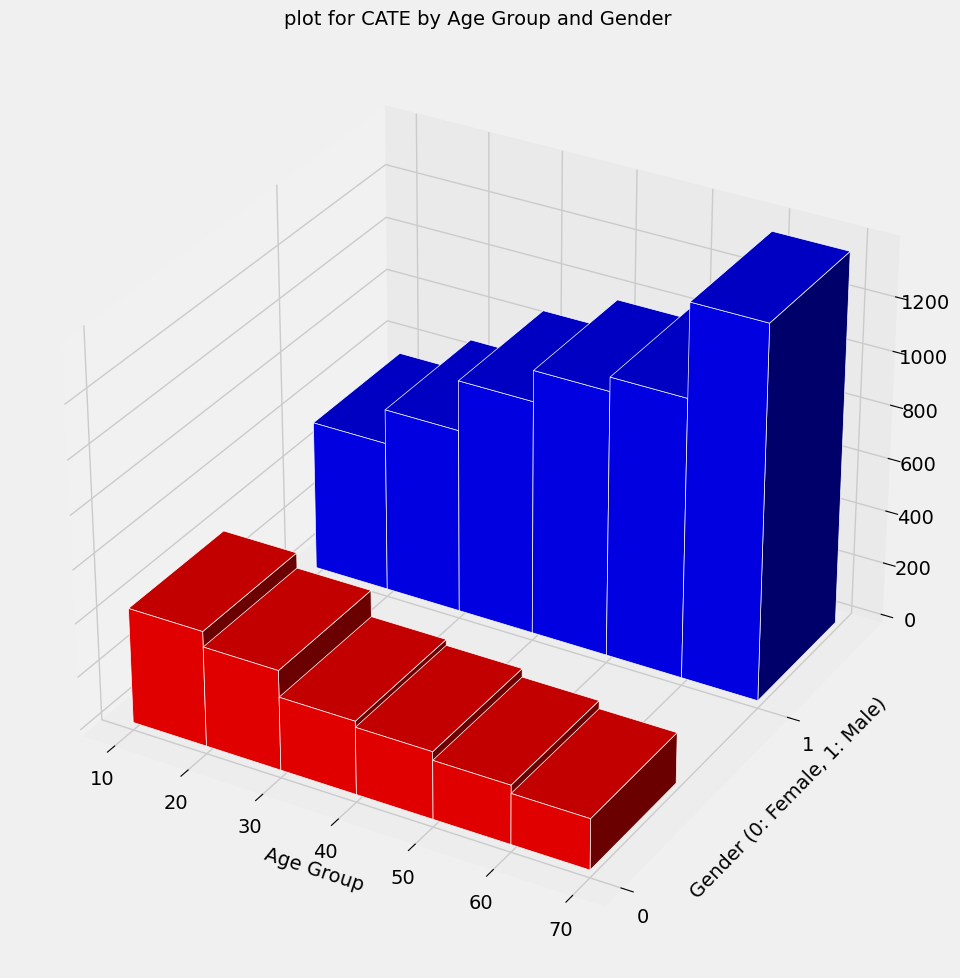

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

gender_ticks = np.unique(cate_grouped['gender'])
colors = ['r' if gender == 0 else 'b' for gender in cate_grouped['gender']]

ax.bar3d(
    cate_grouped['age_group'],
    cate_grouped['gender'],
    np.zeros(len(cate_grouped)),
    10, 0.5,
    cate_grouped['CATE'],
    color=colors,
    zsort='average',
    edgecolor='w') # Add edgecolor parameter here for white lines

ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Gender (0: Female, 1: Male)', fontsize=14)
ax.set_yticks(gender_ticks)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

plt.title("plot for CATE by Age Group and Gender", fontsize=14)
plt.tight_layout()
plt.show()

## 処置反応関数の推定

処置反応関数（Treatment Response Function）は、共変量の値に基づいて、処置の量や強度に対する結果変数の変化を表す関数です。

処置反応関数を推定することで、処置の量や強度を最適化し、望ましい結果を得るための意思決定を支援することができます。

R-Learnerを使用して、CATEを推定します。

以下、コードです。

In [8]:
from causalml.inference.meta import BaseRRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# データセットの分割（訓練データとテストデータ）
X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(
    data[['age', 'gender', 'past_purchases']],
    data['treatment'],
    data['purchase_amount'],
    test_size=0.25,
    random_state=42
)

# 処置反応関数の推定器の定義
dr_estimator = BaseRRegressor(learner=RandomForestRegressor())

# 処置反応関数の推定
dr_estimator.fit(
    X=X_train,
    treatment=treatment_train,
    y=y_train
)

# 処置反応関数の予測
predictions = dr_estimator.predict(X_test)

# numpy.ndarrayをDataFrameに変換
predictions_df = pd.DataFrame(
    predictions,
    columns=['CATE'],
    index=X_test.index)

# X_testとCATEの予測結果を結合
pred_X_test = pd.concat(
    [X_test, predictions_df],
    axis=1)

print("Treatment Response Function Predictions (CATE):")
display(pred_X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Treatment Response Function Predictions (CATE):


,age,gender,past_purchases,CATE
user_id,,,,
522,41,0,6,1015.309893
738,25,1,7,1046.892937
741,27,1,0,524.838019
661,18,0,2,488.834454
412,28,0,7,76.668737
...,...,...,...,...
110,35,1,2,487.717474
431,50,0,0,121.914980
78,19,0,8,103.385551


このコードを簡単に説明します。

    必要なライブラリのインポート
    BaseRRegressor:
causalmlからインポートされ、R-Learnerアプローチに基づくCATEの推定を行うクラス。

    RandomForestRegressor:
Scikit-learnからインポートされ、ランダムフォレスト回帰モデルを提供。

    train_test_split:
Scikit-learnからインポートされ、データを訓練データとテストデータに分割する関数。

    データセットの分割:
train_test_split関数を使用して、データを訓練セットとテストセットに分割します。
この例では、テストセットのサイズを全データの25%に設定しています。random_stateパラメータにより、分割の再現性を確保しています。

    処置反応関数の推定器の定義:
BaseRRegressorを使用して処置反応関数の推定器（dr_estimator）を定義します。
ここでlearnerにはRandomForestRegressor()を指定し、ランダムフォレストモデルを基にした推定を行います。

    処置反応関数の推定:
fitメソッドを用いて、訓練データに基づき処置反応関数の推定を行います。
Xには共変量、treatmentには処置変数、yにはアウトカム変数がそれぞれ渡されます。

    処置反応関数の予測:
訓練された推定器を使用して、テストセットの共変量X_testに対する処置効果の予測を行います。
predictメソッドの結果はpredictionsとして保存されます。

    予測結果のデータフレームへの変換:
予測結果（predictions）はnumpy.ndarray形式であり、これをpd.DataFrameに変換して、変数を'CATE'とし、インデックスをX_test.indexに設定しています。

    予測結果と共変量の結合:
pd.concatを用いて、共変量データX_testと予測結果predictions_dfを列方向に結合し、pred_X_testに保存します。

    予測結果の表示:
最終的に、pred_X_testを表示して、共変量とそれに対するCATEの予測値を確認します。

処置反応関数は、共変量Xの値に基づいて、処置の量や強度に対する結果変数の変化を表す関数です。共変量Xの値を持つ個人に対する処置効果を予測することができます。

処置反応関数はCATEをより一般化した概念であり、連続的な処置変数を扱うことができる点で、CATEよりも柔軟性があります。

CATEは通常、バイナリな処置変数（処置あり/なし）に対して定義されますが、処置反応関数は連続的な処置変数（例えば、割引率）に対しても推定することができます。

マーケティングにおける処置反応関数の活用例としては、以下のようなものがあります。

    キャンペーンの最適化：処置反応関数を用いて、割引率や広告の頻度などのキャンペーンの設定を最適化することができます。
    パーソナライゼーション：個々の顧客の特性に基づいて、最適な処置レベルを予測し、パーソナライズされたキャンペーンを設計することができます。
    予算配分：処置反応関数を用いて、マーケティング予算を最も効果的な施策に配分することができます。
    
処置反応関数の推定は、マーケティング施策の最適化と意思決定の支援に役立ちます。

ただし、処置反応関数の推定には、十分なデータと適切なモデルの選択が重要であり、ドメイン知識を活用して結果の解釈を行う必要があります。

## 因果効果推定結果の活用方法


因果効果推定の結果は、マーケティング戦略の意思決定に直接活用することができます。

ATEに基づくキャンペーンの評価、CATEに基づくターゲティングの最適化、処置反応関数に基づくパーソナライズされたキャンペーンの設計などができます。

## マーケティング戦略への反映

ATEの推定結果を用いて、キャンペーンの全体的な効果を評価し、キャンペーンの継続、改善、または終了の判断を下すことができます。

CATEの推定結果を用いて、顧客セグメントごとのキャンペーンの効果を理解し、セグメント別の戦略を立案することができます。

処置反応関数の推定結果を用いて、最適な処置レベル（例えば、割引率）を決定し、キャンペーンの設定を最適化することができます。

## 施策の最適化と意思決定への活用

CATEの推定結果を用いて、キャンペーンの効果が高い顧客セグメントを特定し、ターゲティングを最適化することができます。

処置反応関数の推定結果を用いて、個々の顧客に対する最適な処置レベルを予測し、パーソナライズされたキャンペーンを設計することができます。

因果効果推定の結果を用いて、マーケティング予算の配分を最適化し、リソースを最も効果的な施策に集中させることができます。

因果効果推定の結果を活用することで、マーケティング戦略の意思決定の質を向上させ、キャンペーンの効果を最大化することができます。

ただし、因果効果推定の結果の解釈には注意が必要であり、ドメイン知識と組み合わせて意思決定を行うことが重要です。

## まとめ

今回は、CausalMLライブラリを用いて、マーケティング事例に因果効果推定を適用する方法を説明しました。

    因果効果推定の重要性
マーケティングにおいて、施策の真の効果を理解することは重要です。因果効果推定を用いることで、交絡因子の影響を取り除き、施策の因果効果を正確に推定することができます。

    CausalMLライブラリの有用性
CausalMLライブラリは、因果効果推定のための様々な手法を提供するPythonライブラリです。ATE、CATE、処置反応関数など、様々な因果効果の推定を行うことができます。

    因果効果推定の活用方法
因果効果推定の結果は、マーケティング戦略の意思決定に直接活用することができます。ATEを用いてキャンペーンの全体的な効果を評価し、CATEを用いて顧客セグメントごとの効果を理解することができます。処置反応関数を用いて、最適な処置レベルを決定し、パーソナライズされたキャンペーンを設計することができます。

    今後のマーケティングにおける因果推論の可能性
因果推論は、データドリブンなマーケティングにおいて重要な役割を果たすと期待されます。より高度な因果推論の手法（例えば、Double Machine LearningやCausal Forest）を用いることで、因果効果推定の精度を高めることができます。

因果推論は、マーケティングにおける意思決定の質を向上させるための強力なツールです。

今後、因果推論の手法をマーケティングに活用することで、データに基づいた意思決定を行い、マーケティングの効果を最大化することが期待されます。

次回は、因果効果推定における交絡因子の調整方法について、より詳細に説明します。